In [1]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt


In [2]:
db = pd.read_csv("https://raw.githubusercontent.com/JhonSebasZ/basedatos/main/Cleaned-Data.csv")
db.head()

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country
0,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,0,1,China
1,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,1,0,China
2,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,1,0,0,China
3,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,0,1,China
4,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,1,0,China


In [3]:
y = db["Severity_Severe"]
db = db.drop(columns=["Severity_Severe", "Country"])

In [4]:
x_train, x_test, y_train, y_test = train_test_split(db, y, test_size=0.4, random_state=0)

In [5]:
knn = KNeighborsClassifier(n_neighbors=4)

In [6]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [7]:
print('exactitud de K-NN classifier en conjunto de entrenamiento: {:.2f}'
     .format(knn.score(x_train, y_train)))
print('exactitud de K-NN classifier en conjunto de prueba: {:.2f}'
     .format(knn.score(x_test, y_test)))

exactitud de K-NN classifier en conjunto de entrenamiento: 0.92
exactitud de K-NN classifier en conjunto de prueba: 0.86


In [8]:
y_pred = knn.predict(x_test)

In [9]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2986    8]
 [ 554  452]]
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2994
           1       0.98      0.45      0.62      1006

    accuracy                           0.86      4000
   macro avg       0.91      0.72      0.77      4000
weighted avg       0.88      0.86      0.84      4000



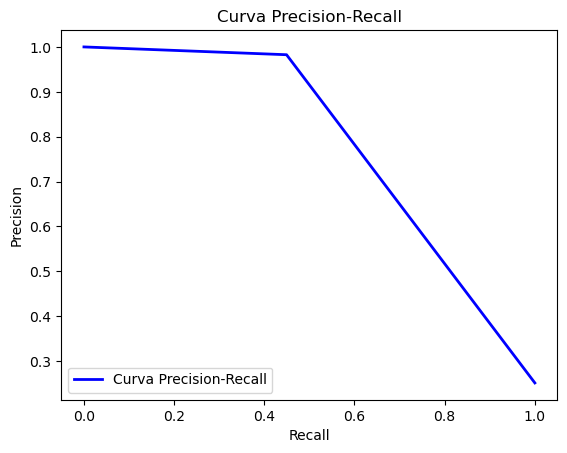

In [10]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

plt.plot(recall, precision, color='blue', lw=2, label='Curva Precision-Recall')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva Precision-Recall')
plt.legend(loc='lower left')
plt.show()

# Analisis de clasificación de pacientes de covid-19 con KNN (K-Nearest Neighbors)

### Metricas del modelo

- La matriz de confusión muestra que el modelo ha predicho correctamente 2986 instancias de la clase 0 (No Severo) y 452 instancias de la clase 1 (Severo). Sin embargo, cometió 8 errores al predecir instancias de la clase 0 como clase 1 (falsos positivos) y 554 errores al predecir instancias de la clase 1 como clase 0 (falsos negativos).

- La precisión es alta para la clase 0 (No Severo), indicando que la mayoría de las predicciones positivas para esta clase son correctas. Sin embargo, la precisión es más baja para la clase 1 (Severo), indicando que algunas de las predicciones positivas para esta clase son incorrectas.

- El recall (también conocido como sensibilidad) es alto para la clase 0, lo que sugiere que el modelo captura la mayoría de las instancias de la clase 0 en el conjunto de prueba. Sin embargo, el recall es más bajo para la clase 1, indicando que el modelo no está capturando todas las instancias de la clase 1. Tal como se muestra en el grafico.

- El F1-score es una medida que combina precisión y recall. El F1-score es alto para la clase 0, pero más bajo para la clase 1, lo que refleja el desequilibrio en precision y recall para la clase 1.


El modelo de clasificación de pacientes con COVID-19 basado en el algoritmo K-Nearest Neighbors (KNN) utiliza criterios definidos por la Organización Mundial de la Salud (OMS) para identificar la presencia de la enfermedad. Al evaluar síntomas significativos como fiebre, fatiga, dificultad para respirar, tos seca y dolor de garganta, el modelo logra una precisión del 86% en su conjunto de prueba. Es importante destacar que el modelo enfrenta desafíos en la clasificación de casos graves, evidenciado por un recall más bajo para esta categoría. En situaciones médicas, donde la identificación precisa de casos graves de COVID-19 es crucial, estos resultados resaltan la necesidad de una evaluación cuidadosa. La interpretación de la severidad de la enfermedad, aunque abordada por el modelo, podría beneficiarse de futuras mejoras y ajustes para su aplicación efectiva en entornos clínicos del mundo real.